# 🔥 Introduction to `PyTorch` -- The basics

[Deep Learning](https://dsai.units.it/index.php/courses/deep-learning/) Course @ [UniTS](https://portale.units.it/en), Spring 2024

<a target="_blank" href="https://colab.research.google.com/github/emaballarin/deeplearning-units/blob/main/labs/01_intro_to_pytorch/01_pytorch_basics.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### An aside on *programming*

![image.png](https://ballarin.cc/code.jpg)
<br><sub><sup>From <a href="https://www.commitstrip.com/en/2016/08/25/a-very-comprehensive-and-precise-spec/">CommitStrip.com (August 25th, 2016)</a></sup></sub>

### What is PyTorch?

[PyTorch](https://pytorch.org/) (sometimes referred to simply as `torch`) is a Python/C++ library for:
- Efficient numerical computing, with support for strong GPU acceleration & parallelism;
- Automatic algorithmic differentiation (mainly in *reverse mode*, *tape-based*; but more recently also in *forward mode*);
- Development of deep artificial neural network models (*a.k.a.* *deep learning*);

It is also well integrated with the *scientific Python stack* (*i.e.* NumPy *& friends*).

The flexibility of PyTorch and its *Pythonic* interfaces make it the most widely adopted framework for research and development, both in academia and industry (especially industrial *R&D*).

For more info about PyTorch, you can have a look at the [official documentation](https://pytorch.org/docs/stable/index.html) or refer to [this book](https://bucket.ballarin.cc/books/EStevens_LAntiga_TViehmann_DeepLearningWithPyTorch.pdf).  
For insights about the inner workings of *autodiff*, you can start exploring the topic from [this survey](https://arxiv.org/abs/1502.05767).

### Preliminary infrastucture setup

In [1]:
!python -m pip install -q pip_install_if_missing

In [2]:
from piim import pip_install_if_missing

pip_install_if_missing("icecream")

In [3]:
# Pretty printouts
from icecream import ic

ic.configureOutput(outputFunction=print)
ic.configureOutput(prefix="    | ")

### Some imports

In [4]:
# It all begins with...
import torch as th  # (or simply `import torch`)

import numpy as np  # For comparison

import matplotlib.pyplot as plt  # For plotting

# For type annotations
from torch import Tensor
from numpy.typing import NDArray
from typing import Any

## Basic operation with `Tensor`s

The main building block of PyTorch's linear algebra capabilities is the `Tensor` class. A torch `Tensor` is the (loose) equivalent of NumPy's `ndarray` and most of the functionalities are the same as in NumPy. In general, it is always possible to perform the same logical/mathematical operations typical of NumPy on torch `Tensor`s.

In [5]:
# Creation of tensors
x: Tensor = th.tensor([[1, 2, 3], [4, 5, 6]])
y: NDArray[Any] = np.array([[1, 2, 3], [4, 5, 6]])

_ = ic(x)
_ = ic(y)

    | x: tensor([[1, 2, 3],
                 [4, 5, 6]])
    | y: array([[1, 2, 3],
                [4, 5, 6]])


In [6]:
# Shapes and sizes
_ = ic(x.size())
_ = ic(x.shape)

_ = ic(y.shape)

    | x.size(): torch.Size([2, 3])
    | x.shape: torch.Size([2, 3])
    | y.shape: (2, 3)


In [7]:
# (d)types
_ = ic(x.dtype)
_ = ic(y.dtype)

    | x.dtype: torch.int64
    | y.dtype: dtype('int64')


You can convert the dtype of a tensor by using `Tensor` methods `float()`, `int()`, etc.... or by using the `to(dtype=...)` method:

In [8]:
print("dtype of x before casting:", x.dtype)
x: Tensor = x.float()
print("dtype of x after casting:", x.dtype)

dtype of x before casting: torch.int64
dtype of x after casting: torch.float32


In [9]:
# Or with more granular control
x: Tensor = x.to(dtype=th.float16)
print("dtype of x:", x.dtype)

dtype of x: torch.float16


Note that you can build a tensor through the constructor `th.Tensor` (as opposed to `torch.tensor`, mind the capitalisation!). In this case, since `th.Tensor` is an alias for `th.FloatTensor`, the tensor you create will have type `th.float32`.

More info on `Tensor` data types: [here](https://pytorch.org/docs/stable/tensors.html).

You can create random tensors, just like you create random arrays in `NumPy`:

In [10]:
x: Tensor = th.rand(
    2, 3, 2
)  # also accepts a list or tuple of integers (e.g. th.rand([2, 3, 2]), etc...)
y: NDArray[Any] = np.random.rand(2, 3, 2)

_ = ic(x)
_ = ic(y)

    | x: tensor([[[0.0566, 0.6746],
                  [0.1083, 0.8392],
                  [0.8146, 0.7506]],
         
                 [[0.4512, 0.5809],
                  [0.4778, 0.6406],
                  [0.2304, 0.5144]]])
    | y: array([[[0.97096942, 0.64125227],
                 [0.83194714, 0.54701953],
                 [0.66671112, 0.78667349]],
         
                [[0.76515973, 0.8957745 ],
                 [0.8366769 , 0.03034972],
                 [0.87956078, 0.22523813]]])


Tensor slicing works like in NumPy, by means of square brackets:

In [11]:
x: Tensor = th.rand(2, 3, 2)
_ = ic(x)

    | x: tensor([[[0.5097, 0.4869],
                  [0.7228, 0.8996],
                  [0.0305, 0.4536]],
         
                 [[0.6089, 0.7877],
                  [0.3264, 0.4518],
                  [0.8162, 0.9160]]])


In [12]:
_ = ic(x[0, 1, 1])

_ = ic(x[0, 1:, 1])

_ = ic(x[:, ::2, :])

    | x[0, 1, 1]: tensor(0.8996)
    | x[0, 1:, 1]: tensor([0.8996, 0.4536])
    | x[:, ::2, :]: tensor([[[0.5097, 0.4869],
                             [0.0305, 0.4536]],
                    
                            [[0.6089, 0.7877],
                             [0.8162, 0.9160]]])


Beware of 0-dimensional vs 1-dimensional tensors:

In [13]:
_ = ic(x[0, 1, 1].shape)

_ = ic(th.tensor(3.14).shape)

_ = ic(th.tensor([3.14]).shape)

    | x[0, 1, 1].shape: torch.Size([])
    | th.tensor(3.14).shape: torch.Size([])
    | th.tensor([3.14]).shape: torch.Size([1])


You can use the `numel` method to get the number of elements (*i.e.* scalars) in a tensor:

In [14]:
# Use of `numel`
_ = ic(x.numel())

_ = ic(th.tensor(3.14).numel())

_ = ic(th.tensor([3.14]).numel())

    | x.numel(): 12
    | th.tensor(3.14).numel(): 1
    | th.tensor([3.14]).numel(): 1


### Tensor reshaping

Changing the shape of a tensor can be a crucial operation.  
To have an idea of its application, just think of `RGB` images. These may be represented as $3\times \text{H}\times \text{W}$ tensors, where $\text{H}$ and $\text{W}$ stand for height and width of the image (in number of pixels). It is often needed to look at an image as a flattened (1D) vector of pixels:

In [15]:
img: Tensor = th.stack(
    tensors=(th.ones(8, 8), th.zeros(8, 8), th.ones(8, 8) / 2), dim=0
)

# Note that reshaping is not in place, so this call does not change the actual shape of img!
img.reshape(3, 64)

_ = ic(img.shape)

img2: Tensor = img.reshape(3, 64)
_ = ic(img2.shape)

    | img.shape: torch.Size([3, 8, 8])
    | img2.shape: torch.Size([3, 64])


When you reshape a tensor, you can leave one dimension unspecified (using `-1`, at most **once**), as it will be inferred automatically.

In [16]:
img_inferred: Tensor = img.reshape(3, -1)
_ = ic(img_inferred.shape)

    | img_inferred.shape: torch.Size([3, 64])


Let's print the "image" (it should be a **uniformly pink** square)...

In [17]:
# plt.imshow(img)
# It errors with "TypeError: Invalid shape (3, 8, 8) for image data"

In fact, `matplotlib` expects arrays in the $\text{H}\times \text{W}\times \text{C}$, whereas `PyTorch` uses the $\text{C}\times \text{H}\times \text{W}$ format.

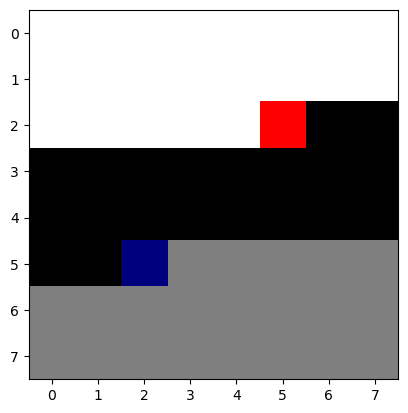

In [18]:
new_img: Tensor = img.reshape(8, 8, 3)
_ = plt.imshow(new_img.numpy())

**Why is it not pink?** 🤔

`reshape` only modifies the shape of a `Tensor`, without changing the way data are stored in memory. The "right" way to change the order of dimensions is to use the `permute` method, which reorders dimensions in-memory.

**Note**

Difference between:
- `view`: operations on contiguous memory;
- `reshape`: operations on (non-)contiguous memory, using `view` wherever possible;
- `permute`: explicit reordering of dimensions and memory;
- `.contiguous()`: ensure that the tensor is stored in contiguous memory (copying if necessary), with no other modification.

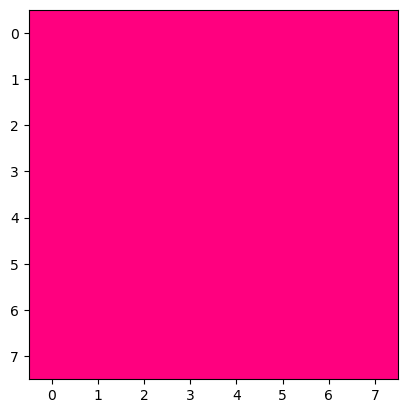

In [19]:
new_img: Tensor = img.permute(1, 2, 0)
_ = plt.imshow(new_img.numpy())

Another memory-contiguity quirk...

In [20]:
z: Tensor = th.tensor([[1, 2, 3], [4, 5, 6]])
y: Tensor = z.t()  # Transposition does not guarantee memory contiguity!
_ = ic(y.size())
# _ = ic(y.view(6))   # It errors, as memory is not contiguously-addressed!
_ = ic(y.contiguous().view(6))  # This works! Or use `reshape` instead of `view`.

    | y.size(): torch.Size([3, 2])
    | y.contiguous().view(6): tensor([1, 4, 2, 5, 3, 6])


### Arithmetic operations

As in NumPy, PyTorch supports all the basic arithmetic operations. By default, these operations are performed **element-wise**.

In [21]:
x: Tensor = th.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y: Tensor = th.tensor([[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]])

_ = ic(x + y)
_ = ic(x / y)

_ = ic(x**2)

    | x + y: tensor([[ 8., 10., 12.],
                     [14., 16., 18.]])
    | x / y: tensor([[0.1429, 0.2500, 0.3333],
                     [0.4000, 0.4545, 0.5000]])
    | x**2: tensor([[ 1.,  4.,  9.],
                    [16., 25., 36.]])


### Linear algebra

An operation we will frequently perform in Deep Learning (often under the hood, though) is **matrix multiplication**. In `torch`, it can be done in many equivalent ways:

In [22]:
x: Tensor = th.rand(4, 5)
y: Tensor = x.T  # matrix transposition; also .t()

# All the same!
_ = ic(x @ y)
_ = ic(x.matmul(y))
_ = ic(th.matmul(x, y))

    | x @ y: tensor([[2.7589, 1.9781, 1.8481, 1.6978],
                     [1.9781, 2.0202, 1.0229, 1.4264],
                     [1.8481, 1.0229, 1.7246, 0.9895],
                     [1.6978, 1.4264, 0.9895, 2.0342]])
    | x.matmul(y): tensor([[2.7589, 1.9781, 1.8481, 1.6978],
                           [1.9781, 2.0202, 1.0229, 1.4264],
                           [1.8481, 1.0229, 1.7246, 0.9895],
                           [1.6978, 1.4264, 0.9895, 2.0342]])
    | th.matmul(x, y): tensor([[2.7589, 1.9781, 1.8481, 1.6978],
                               [1.9781, 2.0202, 1.0229, 1.4264],
                               [1.8481, 1.0229, 1.7246, 0.9895],
                               [1.6978, 1.4264, 0.9895, 2.0342]])


Please note that the operator for matrix multiplication is `@`, not `*`, which indicates the Hadamard (element-wise) product instead.

In [23]:
_ = ic(x * x)

    | x * x: tensor([[5.3017e-01, 4.9619e-01, 4.9818e-01, 3.8894e-01, 8.4542e-01],
                     [9.3142e-01, 3.6632e-01, 5.7612e-01, 1.3856e-01, 7.7880e-03],
                     [1.5409e-01, 6.3461e-03, 6.2776e-02, 7.9258e-01, 7.0881e-01],
                     [2.5537e-03, 9.9025e-01, 3.8834e-01, 6.5274e-01, 3.1501e-04]])


Likewise, the power operator `**` is element-wise, not matrix-wise!

In [24]:
x: Tensor = th.rand(4, 4)

_ = ic(x**2)  # or x.pow(2)
_ = ic(x @ x)

    | x**2: tensor([[0.0105, 0.1844, 0.6043, 0.0879],
                    [0.0447, 0.6765, 0.8923, 0.6324],
                    [0.5708, 0.0181, 0.2970, 0.6403],
                    [0.0261, 0.7873, 0.9214, 0.9814]])
    | x @ x: tensor([[0.7366, 0.7651, 1.1937, 1.2877],
                     [1.0378, 1.6002, 2.2194, 2.2604],
                     [0.6472, 1.2187, 1.7797, 1.5600],
                     [1.0895, 1.8076, 2.4380, 2.5030]])


As in NumPy, there exists a `dot` function to compute the scalar product between vectors. Note that, differently from NumPy, in `torch` this is not equivalent to matrix multiplication, and works only with 1D vectors!

In [25]:
v1: Tensor = x[0, :]
v2: Tensor = x[1, :]

_ = ic(th.dot(v1, v2))

# _ = ic(th.dot(x, x)) # It errors!

    | th.dot(v1, v2): tensor(1.3450)


### Reduction operations

You can easily compute statistics of tensors (or general *reduction operations*, *e.g.* sum, mean, max, min, stddev... of the elements) by either using `torch` functions, or same-named `Tensor` methods:

In [26]:
x: Tensor = th.rand(2, 3, 2)
_ = ic(x)

    | x: tensor([[[0.1467, 0.3975],
                  [0.7459, 0.3524],
                  [0.6929, 0.5012]],
         
                 [[0.6587, 0.7164],
                  [0.9142, 0.3537],
                  [0.6543, 0.7198]]])


In [27]:
_ = ic(x.sum())
_ = ic(th.sum(x))

    | x.sum(): tensor(6.8537)
    | th.sum(x): tensor(6.8537)


In [28]:
_ = ic(x.mean())
_ = ic(th.mean(x))

    | x.mean(): tensor(0.5711)
    | th.mean(x): tensor(0.5711)


In [29]:
_ = ic(x.argmin())
_ = ic(th.min(x))

    | x.argmin(): tensor(0)
    | th.min(x): tensor(0.1467)


It is sometimes useful to specify one or more dimensions to reduce (along which you want to perform your operations):

In [30]:
_ = ic(x.mean(dim=0))
_ = ic(x.argmax(dim=1))
_ = ic(x.sum(dim=(0, 1)))

    | x.mean(dim=0): tensor([[0.4027, 0.5569],
                             [0.8300, 0.3531],
                             [0.6736, 0.6105]])
    | x.argmax(dim=1): tensor([[1, 2],
                               [1, 2]])
    | x.sum(dim=(0, 1)): tensor([3.8127, 3.0410])


## GPU acceleration

PyTorch is designed to work seamlessly with GPUs (or hardware accelerators in general). You can move tensors to the GPU by using the `cuda` method, or the `to` method (for general devices, including CUDA, CPU, and others).

In [31]:
x: Tensor = th.rand(2, 3)
_ = ic(x)
_ = ic(x.device)

    | x: tensor([[0.3876, 0.8396, 0.3117],
                 [0.8634, 0.3876, 0.0785]])
    | x.device: device(type='cpu')


In [32]:
x: Tensor = x.to(device="cuda")  # or x.cuda()
_ = ic(x)
_ = ic(x.device)

    | x: tensor([[0.3876, 0.8396, 0.3117],
                 [0.8634, 0.3876, 0.0785]], device='cuda:0')
    | x.device: device(type='cuda', index=0)


#### Why GPUs?

Let's see...

In [33]:
a: Tensor = th.rand(1000, 1000)
b: Tensor = th.rand(1000, 1000)
_ = ic(th.matmul(a, b))  # Warmup (does not cache the result)

    | th.matmul(a, b): tensor([[248.5054, 244.0699, 260.0825,  ..., 245.6781, 247.1087, 251.7783],
                               [247.3436, 240.7231, 246.9280,  ..., 239.9678, 239.5166, 254.0617],
                               [254.6329, 253.6068, 262.7984,  ..., 255.8509, 251.1407, 263.1866],
                               ...,
                               [246.3882, 237.8904, 248.6055,  ..., 239.7312, 239.7239, 246.7213],
                               [252.1723, 247.4497, 258.6422,  ..., 249.1569, 246.3595, 256.9336],
                               [253.2659, 247.6227, 252.1317,  ..., 243.6900, 248.9021, 250.1017]])


In [34]:
# On CPU
for _ in range(1000):
    r: Tensor = th.matmul(a, b)

In [35]:
a_cuda: Tensor = a.cuda()
b_cuda: Tensor = b.cuda()
_ = ic(th.matmul(a_cuda, b_cuda))  # Warmup (does not cache the result)

    | th.matmul(a_cuda, b_cuda): tensor([[248.5053, 244.0698, 260.0825,  ..., 245.6782, 247.1088, 251.7783],
                                         [247.3437, 240.7231, 246.9280,  ..., 239.9677, 239.5165, 254.0617],
                                         [254.6329, 253.6068, 262.7984,  ..., 255.8509, 251.1407, 263.1865],
                                         ...,
                                         [246.3882, 237.8903, 248.6055,  ..., 239.7313, 239.7238, 246.7215],
                                         [252.1723, 247.4496, 258.6422,  ..., 249.1570, 246.3595, 256.9336],
                                         [253.2659, 247.6227, 252.1317,  ..., 243.6899, 248.9020, 250.1017]],
                                        device='cuda:0')


In [36]:
# On GPU
for _ in range(1000):
    r: Tensor = th.matmul(a_cuda, b_cuda)

A >12x speedup, just by moving the computation to the GPU!